# Computer Vision Example

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Label: 9

Image pixel array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

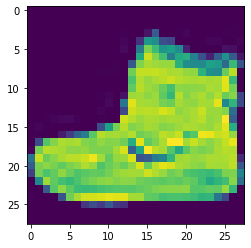

In [4]:
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

print(f'Label: {training_labels[index]}')
print()
print(f'Image pixel array: {training_images[index]}')

plt.imshow(training_images[index])
plt.show()

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Check Softmax

In [7]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')
print()

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')
print()

sum_ = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum_}')
print()

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]

output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]

sum of outputs: 1.0

class with highest probability: 2


## Training

In [8]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5019 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3153 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.8908


In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3583 - accuracy: 0.8726


[0.3583137094974518, 0.8726000189781189]

## Exploration exercises

Pred
[0.    0.    0.    0.    0.    0.011 0.    0.069 0.    0.92 ]
Actual
9


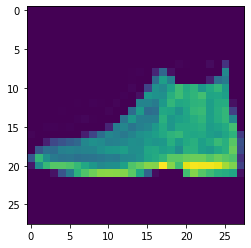

In [12]:
classifications = model.predict(test_images)

print('Pred')
print(np.round(classifications[0], 3))
print('Actual')
print(test_labels[0])

plt.imshow(test_images[0])
plt.show()

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print('Pred')
print(np.round(classifications[0], 3))
print('Actual')
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4739
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3563
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3211
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2976
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3468
Pred
[0.    0.    0.    0.    0.    0.001 0.    0.032 0.    0.967]
Actual
9


In [14]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

11501568/11490434 [==============================] - 4s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2003
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0364
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0714
[3.5671106e-09 3.3595340e-09 7.5469080e-07 2.0829876e-04 7.5988728e-14 1.0904231e-09 8.6775647e-12 9.9978977e-01 6.9431451e-08 1.1792090e-06]
7
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6289
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3336
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3178
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2800
Epoch 5/5
313/313 [==============================] - 1s

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.6:
            print('\nReached 60% accuracy so cancelling training!')
            self.model.stop_training = True

            
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    training_images,
    training_labels,
    epochs=5,
    callbacks=[myCallback()]
)

Epoch 1/5
1867/1875 [============================>.] - ETA: 0s - loss: 2.5964 - accuracy: 0.9055
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5872 - accuracy: 0.9057


In [11]:
# https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world.ipynb

## Reference

- [Ungraded Lab: Beyond Hello World, A Computer Vision Example](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world.ipynb)